# ⭐AIFFEL 대전 1기 Exploration 13. 주식 데이터 예측하기 ⭐
>  프로젝트 소개: 주식 데이터(시계열) 예측

***

# 🎯 프로젝트 목표
   * 시계열 데이터 특성 이해
   * 시계열 데이터 분해에 대한 이해
   * 시계열 데이터 전처리 및 학습, 예측

***

# ✅프로젝트 순서
## 0. 개념 정리
## 1. 시계열 데이터 준비
## 2. 전처리 수행
## 3. 시계열 안정성 분석
## 4. 학습, 데이터 데이터셋 생성
## 5. 적정 ARIMA 모수 찾기
## 6. ARIMA 모델 훈련과 테스트
## 7. 다른 주식 종목 예측해보기 (1) - pfizer
## 8. 다른 주식 종목 예측해보기 (2) - NVIDIA
## 9. 결과
- 9-1. 삼성  
- 9-2. pfizer  
- 9-3. NVIDIA  

## 10. 회고
- 10-1. 루브릭 평가  
- 10-2. 회고  

***

# 0. 개념정리
### 1) 시계열 데이터
- 시간 순서대로 발생한 데이터의 수열 (예시: 시간에 따른 기온 변화)  
- 시간 순서대로 변하는 주가  

### 2) Stationary(안정적) 데이터
- 과거의 데이에서 일정한 패턴이 있으며 미래에도 동일하게 반복될 것이라는 특성  
- `안정적이다`이란 것은 시계열 데이터의 통계적 특성이 변하지 않는다는 뜻.  
- 세 가지 특징  
1) 시간의 추이와 관계없이 평균이 불변  
2) 시간의 추이와 관계없이 분산이 불변  
3) 두 시점 간의 공분산이 기준시점과 무관  

### 3) Covariance(공분산), Correlation(상관계수)
두 지표 모두 확률변수간의 분포가 서로 얼마나 상관성을 가지는 지 나타내는 지표이지만  
공분산은 음/양에 따라 각 확률 분포의 관계를 알 수 있고,  
상관계수는 확률 분포의 크기에 구애받지 않고 확률 분포의 관계를 알 수 있다.  
> 출처: https://destrudo.tistory.com/15  

여기서 질문! 자기와의 공분산이라면 그냥 분산이 되는데, 분산이라고 하지 않고 자기공분산이라고 하는 이유는?  
\>> X(t)와 X(t) 사이의 공분산이 아니라 X(t)와 X(t+h) 사이의 공분산이기 때문. 즉 일정 시차 h 사이를 둔 자기자신과의 공분산이기 때문이다.  

(아래는 예시)
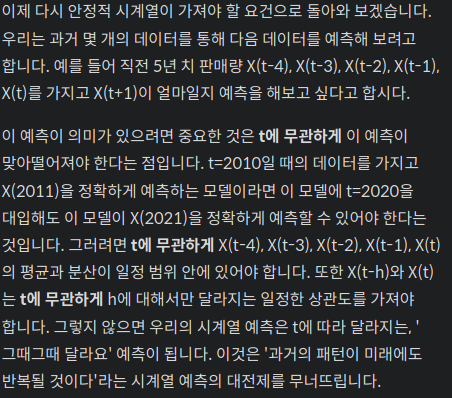  

### 4) Augmented Dickey-Fuller Test
- 시계열 데이터의 안정성을 테스트하는 방법 중 하나  
- `시계열 데이터가 안정적이지 않다`라는 `귀무가설(Null Hypothesis)`을 세운 후, 통게적 가설 검정 과정을 통해 이 귀무가설이 기각될 경우에 `이 시계열 데이터가 안정적이다`라는 `대립가설(Alrenative Hypothesis)`을 채택  

1) 귀무가설은 일단 분석가가 맞다고 생각하는 걸 가정한다.  
2) 통계량의 '분포'가 존재하며 이 분포는 (예를 들어) 170 ~ 190 범위 내에 들어갈 확률이 95%(정규분포)가 된다.  
3) 만약 계산해보니 값이 198이 나왔다면(나올 확률이 0.01) 정규분포의 신뢰구간 내에 들어가지 않으므로 귀무가설을 기각하는 것(대립가설을 받아들인다.)  
4) 그렇지만 1%(0.01) 확룔로 198이 나와서 귀무가설을 기각했지만 1%확률로 198이 나올 수도 있다. 즉, 1%확률로 `귀무가설이 틀렸다는 의견이 틀릴 확률이 0.01이 있는 것`  
5) 이것이 `p-value`이다. p-value가 작을수록 귀무가설을 기각하는 힘(대립가설을 받아들이는 힘)이 커진다.  
> 출처: https://m.blog.naver.com/baedical/10109291879  

### 5) 시계열 분해
**Original = Trend + Seasonality + Residual**
- Trend(추세): 시간 추이에 따라 나타나는 평균값의 변화  
- Seasonality(계절성): Trend에는 잡히지 않지만 시계열 데이터 안에 포함된 패턴이 파악되지 않는 주기적 변화  
- Residual(잔차): 원본 데이터에서 추세와 계절성을 삭제한 데이터. 안정성 검증을 통해 p-value를 확인하고 학습을 시작해야 한다.

### 6)  ARIMA 모델
**Autoregressive(AR) Intergrated(I) Moving Average(MA)**  
- `AR`: 자기회귀. 현재 데이터가 이전 데이터 `p`개의 가중합으로 수렴한다고 보는 모델이며, 시계열에서 **Residual**에 해당하는 부분을 모델링(주식값이 항상 일정한 균형 수준을 유지할 것이라는 예측)  
- `I`: 차분누적. 현재 데이터가 이전 데이터와 `d`차 차분의 누적합이라고 보는 모델이며, **계절성**에 해당하는 부분을 모델링  
- `MA`: 이동평균. 현재 데이터가 이전 `q`개의 **예측오차값**의 가중합으로 수렴한다고 보는 모델이며, **추세**에 해당하는 부분을 모델링  

**여기서 p + q < 2, p\*q = 0이며, p 또는 q가 0이라는 의미**

#### 모수 결정(p, d, q)
- `ACF`: 시차(lag)에 따른 관측자들 사이의 관련성을 측정하는 함수  
- `PACF`: 다른 관측치의 영향을 배제하고 두 시차의 관측치 간 관련성을 측정하는 함수

***

# 1. 시계열 데이터 준비
- 칼럼 종류: Date, Open(시작가), High(최고가), Low(최저가), **Close(종가)**, Adj Close(수정종가), Volume(거래량)  

**Close(종가)만 사용**  

![삼성로고](pics/삼성.jpeg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Time Series 생성
dataset_filepath = os.getenv('HOME') + '/1.AIFFEL_Study/Exploration/E13_Stock_Prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col = 'Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64

***

# 2. 전처리 수행
- 결측치 처리  
- 로그 변환

**결측치 처리**

In [2]:
# 결측치 처리 --> 결측치 없음

ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

**로그 변환**

In [3]:
# 로그 변환

ts_log = np.log(ts)

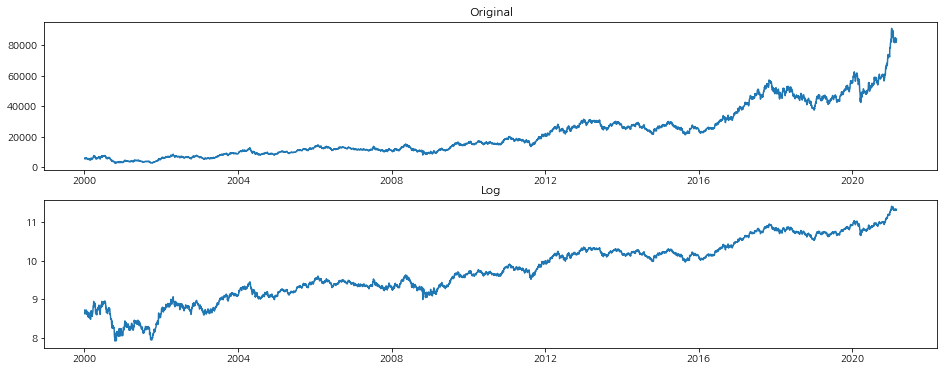

In [4]:
# 원본 데이터와 로그 변환 후 분포 확인

from matplotlib.pylab import rcParams
%matplotlib inline


plt.rcParams["figure.figsize"] = (16,6)

ax = plt.subplot(2,1,1)
plt.plot(ts)
ax.set_title('Original')

ax = plt.subplot(2,1,2)
plt.plot(ts_log)
ax.set_title('Log')

plt.show()

***

# 3. 시계열 안정성 분석
- 정성적 그래프 분석  
- 정량적 Augmented Dicky-Fuller Test  
- 시계열 분해(Time Series Decompostion)  
- Residual 안정성 확인

**정성적 분석**

In [5]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

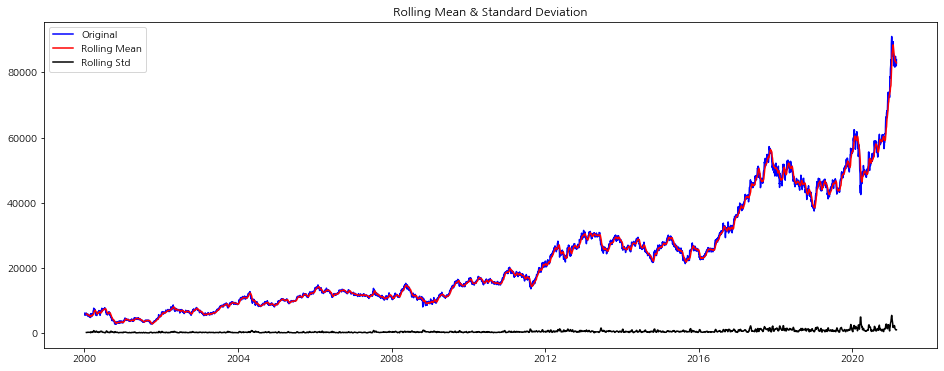

In [6]:
plot_rolling_statistics(ts)

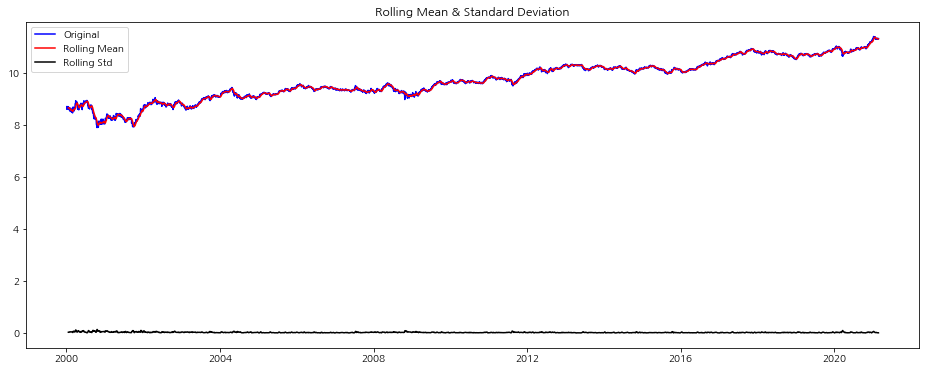

In [7]:
plot_rolling_statistics(ts_log)

**정량적 Augmented Dicky-Fuller Test**  
- 로그 변환 후 p-value 감소: 로브 변환 데이터 이용

In [8]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [9]:
augmented_dickey_fuller_test(ts) # p-value = 0.998989

Results of Dickey-Fuller Test:
Test Statistic                    2.357410
p-value                           0.998989
#Lags Used                       26.000000
Number of Observations Used    5290.000000
Critical Value (1%)              -3.431587
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


In [10]:
augmented_dickey_fuller_test(ts_log) # p-value = 0.925421

Results of Dickey-Fuller Test:
Test Statistic                   -0.300586
p-value                           0.925421
#Lags Used                        4.000000
Number of Observations Used    5312.000000
Critical Value (1%)              -3.431582
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


**정성적 그래프 분석, 정량적 Augmented Dicky-Fuller Test, 시계열 분해 통합**

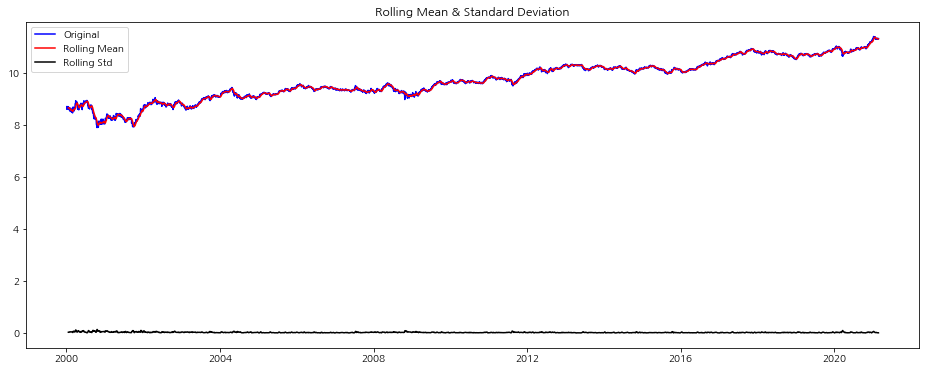

Results of Dickey-Fuller Test:
Test Statistic                   -0.300586
p-value                           0.925421
#Lags Used                        4.000000
Number of Observations Used    5312.000000
Critical Value (1%)              -3.431582
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


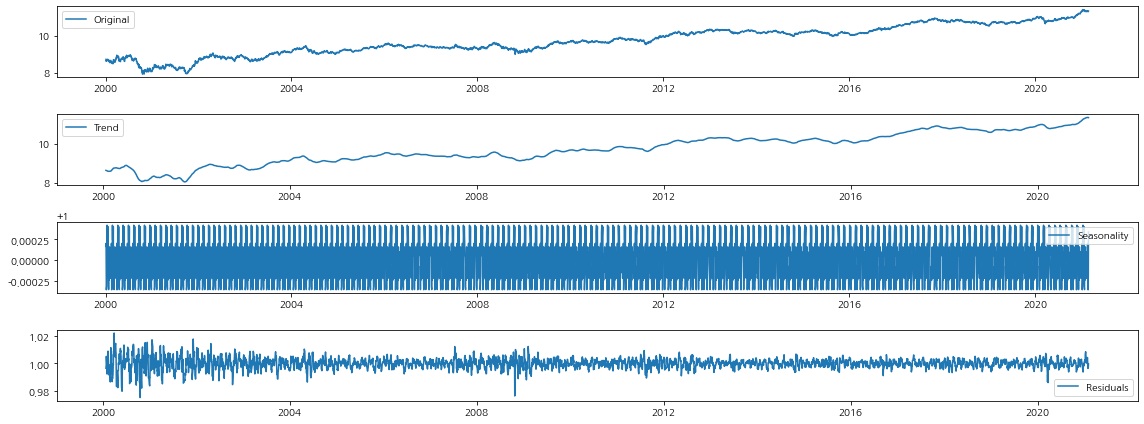

In [11]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose # 시계열 안에 존재하는 trend, seasonality를 직접 분리
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Residual에 대해 안정성 여부 확인**  
- p-value 매우 작아짐: Stationary 확인

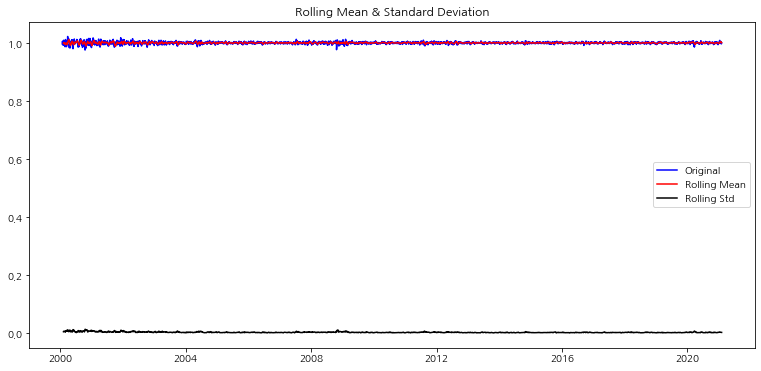

In [12]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [13]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual) # 3.955116e-30

Results of Dickey-Fuller Test:
Test Statistic                -1.759307e+01
p-value                        3.955116e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.253000e+03
Critical Value (1%)           -3.431595e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


***

# 4. 학습, 테스트 데이터셋 생성
- 학습, 테스트 데이터셋 분리

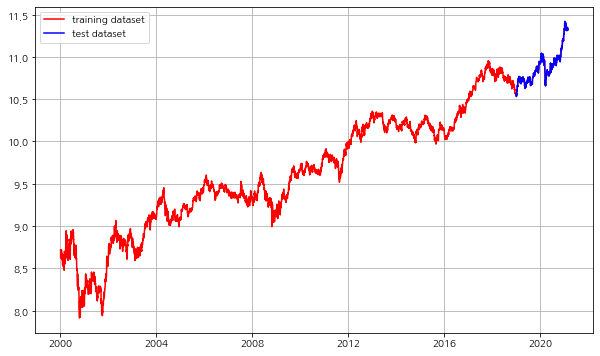

In [14]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

***

# 5. 적정 ARIMA 모수 찾기
- ACF, PACF 그려보기 -> p,q 구하기 (p:1, q:0)   
- 차분 안정성 확인 -> d 구하기(d: 1)

**ACF, PACF 그려보기 -> p,q 구하기 (p:1, q:0)**

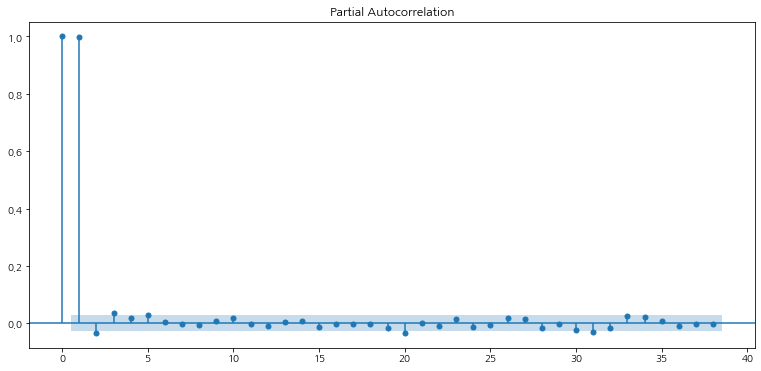

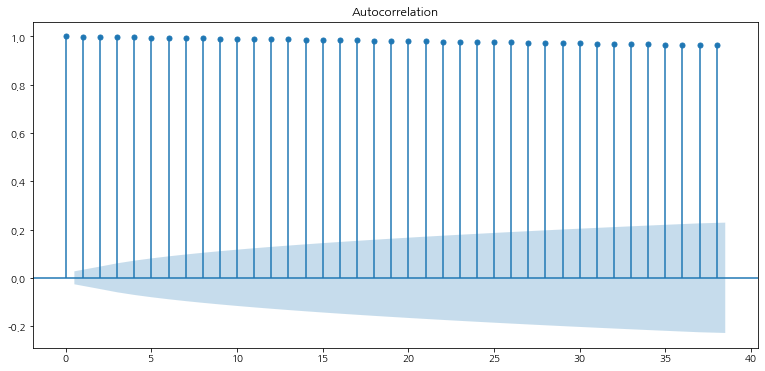

In [15]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기, AR 모델의 시차 p 결정
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기, MA 모델의 시차 q 결정
plt.show()

**차분 안정성 확인 -> d 구하기**

Results of Dickey-Fuller Test:
Test Statistic                  -40.097389
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5312.000000
Critical Value (1%)              -3.431582
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -21.828284
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5281.000000
Critical Value (1%)              -3.431589
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


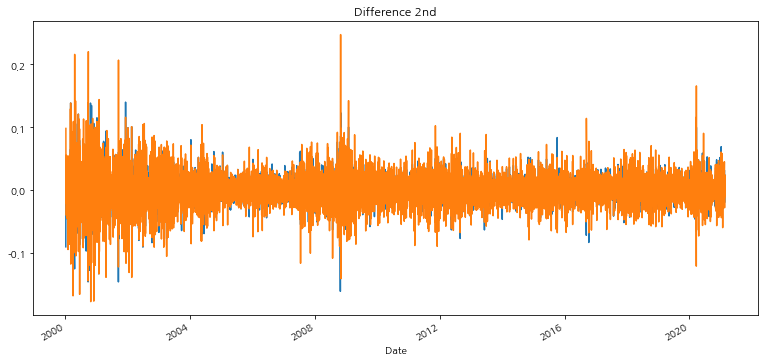

In [16]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

***

# 6. ARIMA 모델 훈련과 테스트
- ARIMA 모델 빌드와 훈련  
- 모델 테스트 및 플로팅  
- 최종 예측 모델 정확도 측정(MAPE)

**ARIMA 모델 빌드와 훈련**

In [17]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 1, 0)) # p, d, q  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4784
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11274.679
Method:                       css-mle   S.D. of innovations              0.023
Date:                Sun, 28 Feb 2021   AIC                         -22543.358
Time:                        22:59:06   BIC                         -22523.939
Sample:                             1   HQIC                        -22536.537
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      1.104      0.270      -0.000       0.001
ar.L1.D.Close     0.0437      0.014      3.018      0.003       0.015       0.072
                                    Root

/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

**모델 테스트 및 플로팅**

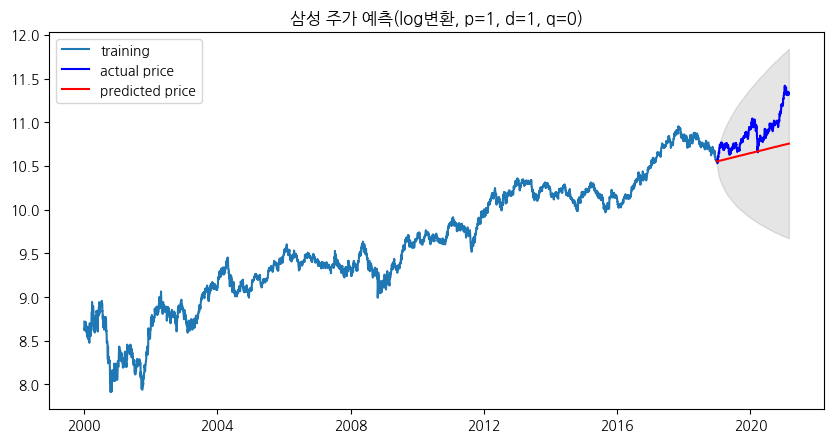

In [18]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.title('삼성 주가 예측(log변환, p=1, d=1, q=0)')
plt.savefig('삼성, log변환, (p,d,q)=(1,1,0).png')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

**최종 예측 모델 정확도 측정(MAPE)**
- MAPE의 값이 **19.59%**으로 아직 개선할 부분이 있다.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  225312418.53819293
MAE:  11758.804014424799
RMSE:  15010.410338767988
MAPE: 19.59%


## 아래는 삼성 주가 데이터를 가지고 더 좋은 예측을 구하기 위한 시도들이다.
1. p,d,q의 값 변경  
2. 데이터 변환  
1) 기존 데이터(raw -> log 변환)를 log 변환. **raw -> log변환 -> log변환**  
2) 기존 데이터(raw -> log 변환)에 scale 적용. **raw -> log변환 -> \*0.x**  

### 변경 결과
- p,d,q의 변경으로 유의미한 결과를 얻지 못했다.  
- 데이터 변환으로 log변환을 2회 한 결과 예측 결과는 실제와 달라졌지만 MAPE값이 감소했다.  

**하지만 이 결과는 MAPE를 구하는 식 중 `np.abs(np.exp(test_data))`의 값이 작아져서 그렇게 나온 것으로 생각한다.**

### p,d,q = 0,1,5
**MAPE: 19.31%**  
### p,d,q = 0,1,10 
**MAPE: 19.22%**  
### p,d,q = 0,1,12
**MAPE:19.28 %**
### p,d,q = 0,1,20 
**MAPE: 19.92%**  
### p,d,q = 0,1,30 
**MAPE: 21.19%**  
### p,d,q = 1,1,0 
**MAPE: 19.59%**  
### p,d,q = 2,1,0
**MAPE: 19.48%**  
### p,d,q = 1,1,0 (로그 변환 -> 로그 변환)
**MAPE: 1.97%**
### p,d,q = 1,1,0 (로그 변환 -> \*0.8)
**MAPE: 16.13%**  
### p,d,q = 1,1,0 (로그 변환 -> \*0.6)
**MAPE: 12.46%**  
### p,d,q = 1,1,0 (로그 변환 -> \*0.4)
**MAPE: 8.56%**  
### p,d,q = 0,1,10 (로그 변환 -> \*0.4)
**MAPE: 8.39%**  

/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

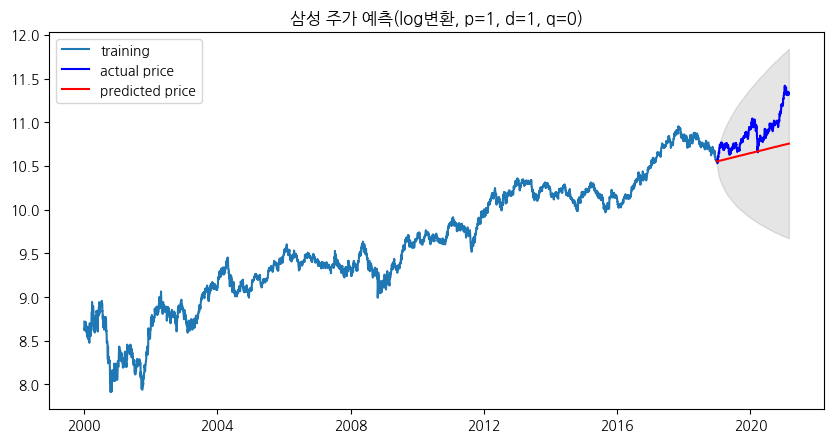

MSE:  225312418.53819293
MAE:  11758.804014424799
RMSE:  15010.410338767988
MAPE: 19.59%


In [48]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)

ts_log_log = np.log(ts_log)
ts_exp = ts_log * 0.4
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]

model = ARIMA(train_data, order=(1, 1, 0)) # p, d, q  
fitted_m = model.fit(disp=-1)

# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.title('삼성 주가 예측(log변환, p=1, d=1, q=0)')
# plt.savefig('삼성, log변환, (p,d,q)=(0,1,30).png')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

In [46]:
ts_exp = ts_log * 0.4
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
train_data, test_data_ = ts_exp[:int(len(ts_exp)*0.9)], ts_exp[int(len(ts_exp)*0.9):]

print(np.abs(np.exp(test_data)))
print(np.abs(np.exp(test_data_)))

Date
2018-12-28    38700.0
2019-01-02    38750.0
2019-01-03    37600.0
2019-01-04    37450.0
2019-01-07    38750.0
               ...   
2021-02-19    82600.0
2021-02-22    82200.0
2021-02-23    82000.0
2021-02-24    82000.0
2021-02-25    83900.0
Name: Close, Length: 532, dtype: float64
Date
2018-12-28    68.404455
2019-01-02    68.439792
2019-01-03    67.619996
2019-01-04    67.511962
2019-01-07    68.439792
                ...    
2021-02-19    92.638608
2021-02-22    92.458901
2021-02-23    92.368851
2021-02-24    92.368851
2021-02-25    93.219074
Name: Close, Length: 532, dtype: float64


***

# 7. 다른 주식 종목 예측해 보기 (1) - pfizer

![화이자 로고](pics/화이자.jpeg)

### 데이터 불러오기

In [137]:
# Time Series 생성
dataset_filepath = os.getenv('HOME') + '/1.AIFFEL_Study/Exploration/E13_Stock_Prediction/data/PFE.csv'
df = pd.read_csv(dataset_filepath, index_col = 'Date', parse_dates=True)
pfizer = df['Close']

pfizer.head()

Date
1972-06-01    0.815346
1972-06-02    0.805463
1972-06-05    0.802993
1972-06-06    0.820288
1972-06-07    0.820288
Name: Close, dtype: float64

### 결측치 처리

In [138]:
pfizer=pfizer.interpolate(method='time')
pfizer[pfizer.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

### 데이터 변환 (로그, 시그모이드, ReLU)
- 로그 변환: 음수가 생긴다.  
- 시그모이드 변환: 최대값이 1이 되는 문제가 생긴다.  
- ReLU 변환: 음수가 생기지도 않고 최대값이 고정되지 않는다.  

**로그 변환 후 음수가 되는 부분은 사용하지 않기로.  로그 변환 -> ReLU 변환**

In [139]:
# 변환 함수 정의

import numpy as np
import matplotlib.pylab as plt

# 시그모이드
def sigmoid(x):
    return 1 / (1+np.exp(-x))

# ReLU 변환
def relu(x):
    return np.maximum(0.0001,x) # 0이 분포에 포함되면 안되므로 작은 값을 설정함

In [140]:
# 로그 변환
pfizer_log = np.log(pfizer)

# 시그모이드 변환
pfizer_sigmoid = sigmoid(pfizer)

# ReLU 변환, 원래 데이터에 음수가 없으므로 원본 데이터와 동일하다.    
pfizer_relu = relu(pfizer)

# 최종 변환(로그 변환 -> ReLU 변환)
pfizer_final = relu(pfizer_log)

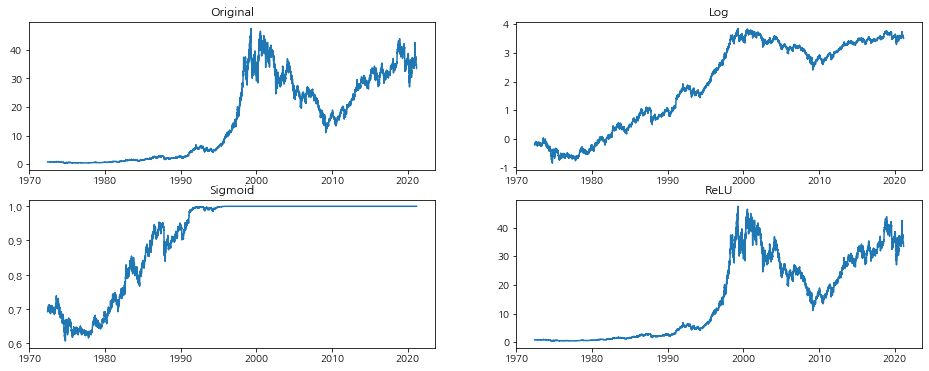

In [141]:
# 원본 데이터와 로그 변환 후 분포 확인

from matplotlib.pylab import rcParams
%matplotlib inline

plt.rcParams["figure.figsize"] = (16,6)

ax = plt.subplot(2,2,1)
plt.plot(pfizer)
ax.set_title('Original')

ax = plt.subplot(2,2,2)
plt.plot(pfizer_log)
ax.set_title('Log')

ax = plt.subplot(2,2,3)
plt.plot(pfizer_sigmoid)
ax.set_title('Sigmoid')

ax = plt.subplot(2,2,4)
plt.plot(pfizer_relu)
ax.set_title('ReLU')

plt.show()

**원본 데이터와 최종 변환(log -> ReLU) 후 데이터 분포 확인**

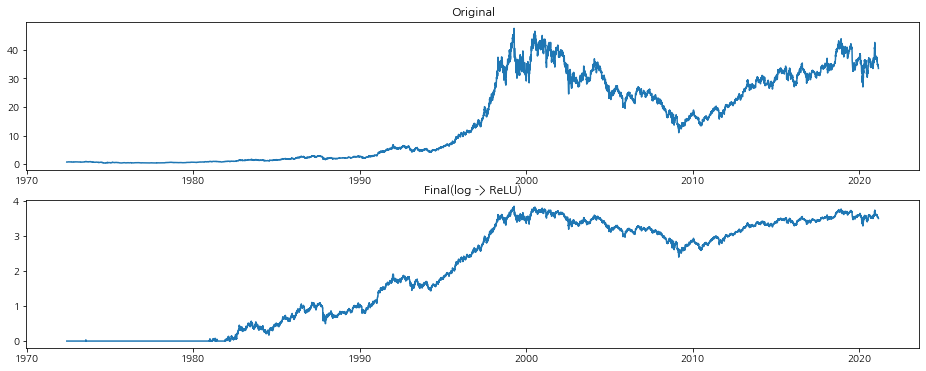

In [142]:
plt.rcParams["figure.figsize"] = (16,6)

ax = plt.subplot(2,1,1)
plt.plot(pfizer)
ax.set_title('Original')

ax = plt.subplot(2,1,2)
plt.plot(pfizer_final)
ax.set_title('Final(log -> ReLU)')

plt.show()

**원본 데이터와 최종 변환 데이터 p-value 확인**

In [143]:
augmented_dickey_fuller_test(pfizer)       # 0.765136
augmented_dickey_fuller_test(pfizer_log)   # 0.781426
augmented_dickey_fuller_test(pfizer_final) # 0.789194

Results of Dickey-Fuller Test:
Test Statistic                    -0.966925
p-value                            0.765136
#Lags Used                        40.000000
Number of Observations Used    12251.000000
Critical Value (1%)               -3.430884
Critical Value (5%)               -2.861776
Critical Value (10%)              -2.566896
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                    -0.919671
p-value                            0.781426
#Lags Used                         6.000000
Number of Observations Used    12285.000000
Critical Value (1%)               -3.430882
Critical Value (5%)               -2.861775
Critical Value (10%)              -2.566895
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                    -0.896283
p-value                            0.789194
#Lags Used                        26.000000
Number of Observations Used    12265.000000
Critical Value (1%)               -3.430883
Critical Value (5%)               -2.8617

**정성적 그래프 분석, 정량적 Augmented Dicky-Fuller Test, 시계열 분해**

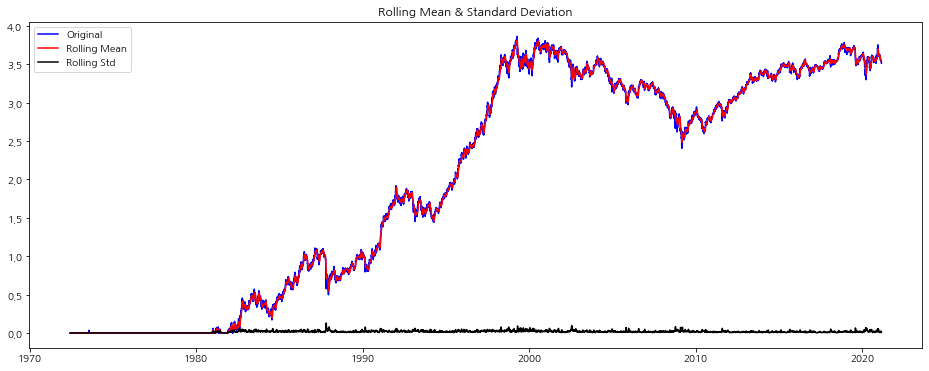

Results of Dickey-Fuller Test:
Test Statistic                    -0.896283
p-value                            0.789194
#Lags Used                        26.000000
Number of Observations Used    12265.000000
Critical Value (1%)               -3.430883
Critical Value (5%)               -2.861776
Critical Value (10%)              -2.566895
dtype: float64


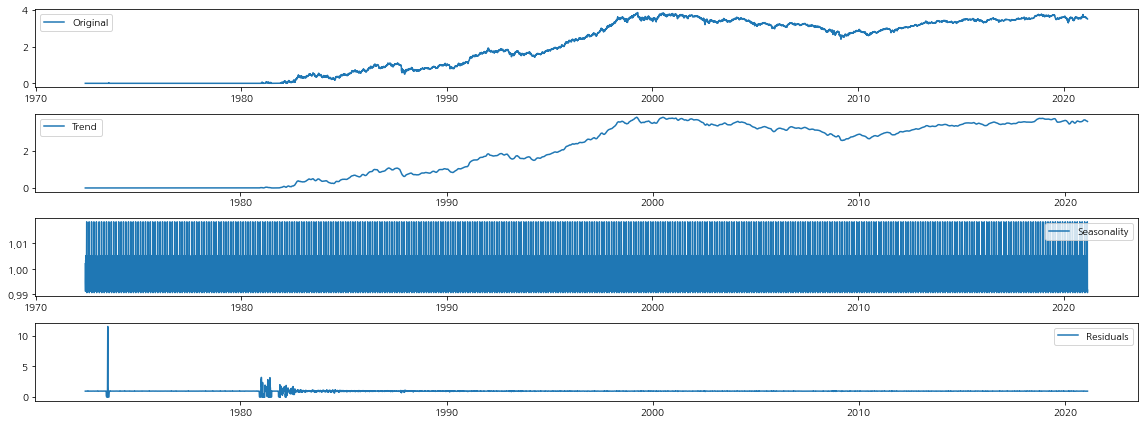

In [144]:
# 정성적 그래프 분석
plot_rolling_statistics(pfizer_final, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(pfizer_final)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose # 시계열 안에 존재하는 trend, seasonality를 직접 분리
decomposition = seasonal_decompose(pfizer_final, model='multiplicative', period = 30) 

pfizer_trend = decomposition.trend
pfizer_seasonal = decomposition.seasonal
pfizer_residual = decomposition.resid

plt.subplot(411)
plt.plot(pfizer_final, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(pfizer_trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(pfizer_seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(pfizer_residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Residual에 대해 안정성 여부 확인**

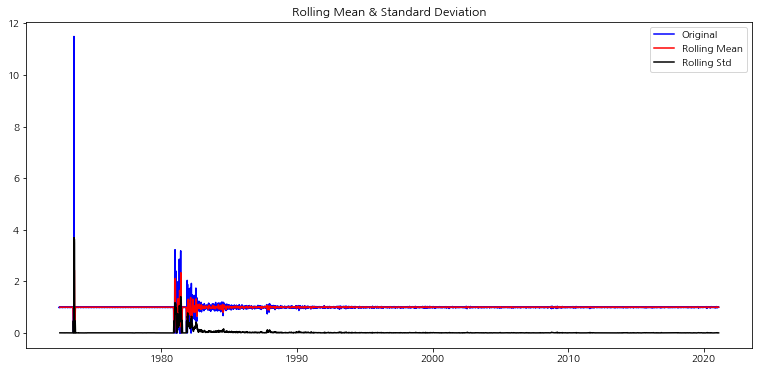

Results of Dickey-Fuller Test:
Test Statistic                   -22.742838
p-value                            0.000000
#Lags Used                        36.000000
Number of Observations Used    12225.000000
Critical Value (1%)               -3.430885
Critical Value (5%)               -2.861776
Critical Value (10%)              -2.566896
dtype: float64


In [145]:
# Residual에 대해 안정성 여부 확인
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(pfizer_residual)

pfizer_residual.dropna(inplace=True)
augmented_dickey_fuller_test(pfizer_residual)

**학습, 테스트 데이터셋 분리**

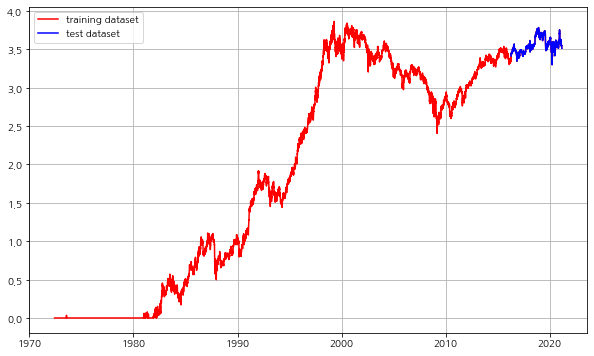

In [146]:
# 학습, 테스트 데이터셋 분리
pfizer_train_data, pfizer_test_data = pfizer_final[:int(len(pfizer_final)*0.9)], pfizer_final[int(len(pfizer_final)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(pfizer_final, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 pfizer_final를 선택
plt.plot(pfizer_test_data, c='b', label='test dataset')
plt.legend()

**ACF를 통해 MA 모델의 시차 q를 결정하고, PACF를 통해 AR 모델의 시차 p를 결정**

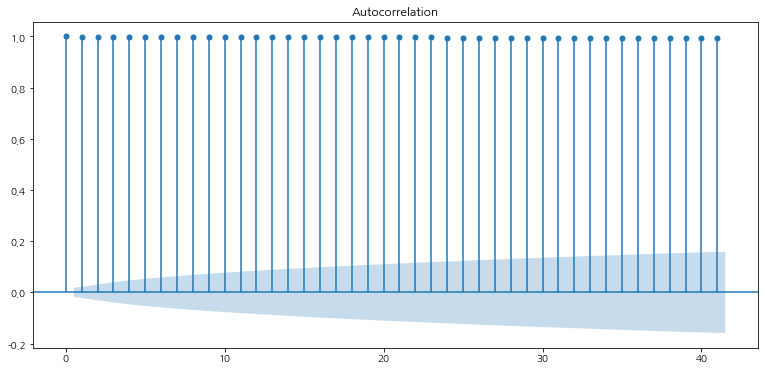

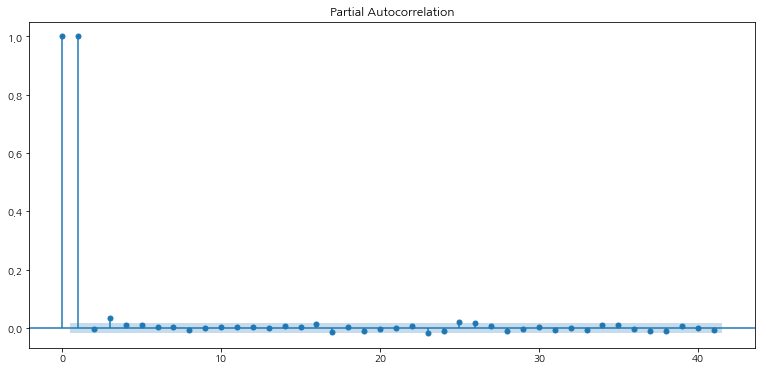

In [147]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(pfizer_final)   # ACF : Autocorrelation 그래프 그리기, MA 모델의 시차 q 결정
plot_pacf(pfizer_final)  # PACF : Partial Autocorrelation 그래프 그리기, AR 모델의 시차 p 결정
plt.show()

**차분 안정성 확인 -> d구하기**

Results of Dickey-Fuller Test:
Test Statistic                   -48.518657
p-value                            0.000000
#Lags Used                         5.000000
Number of Observations Used    12285.000000
Critical Value (1%)               -3.430882
Critical Value (5%)               -2.861775
Critical Value (10%)              -2.566895
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -31.701515
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    12250.000000
Critical Value (1%)               -3.430884
Critical Value (5%)               -2.861776
Critical Value (10%)              -2.566896
dtype: float64


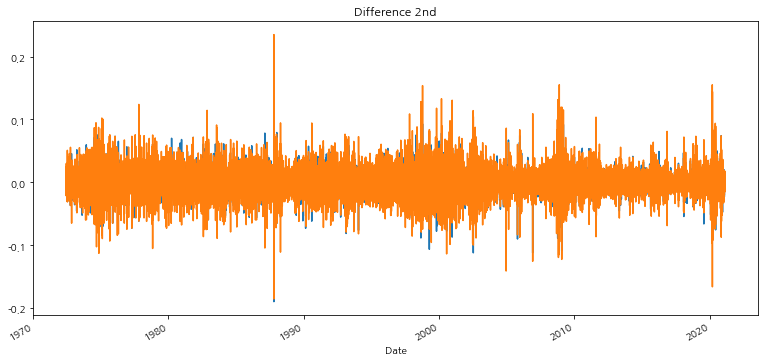

In [148]:
# 차분 안정성 확인 -> d구하기
# 1차 차분 구하기
diff_1 = pfizer_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

**ARIMA 모델 빌드와 훈련**

In [149]:
# ARIMA 모델 빌드와 훈련
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
pfizer_model = ARIMA(pfizer_train_data, order=(1, 1, 0)) # p, d, q  
pfizer_fitted_m = pfizer_model.fit(disp=-1)  
print(pfizer_fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                11061
Model:                 ARIMA(1, 1, 0)   Log Likelihood               30383.054
Method:                       css-mle   S.D. of innovations              0.016
Date:                Mon, 01 Mar 2021   AIC                         -60760.109
Time:                        01:58:03   BIC                         -60738.175
Sample:                             1   HQIC                        -60752.721
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      2.085      0.037    1.86e-05       0.001
ar.L1.D.Close     0.0074      0.010      0.779      0.436      -0.011       0.026
                                    Root

/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

**모델 테스트 및 플로팅**

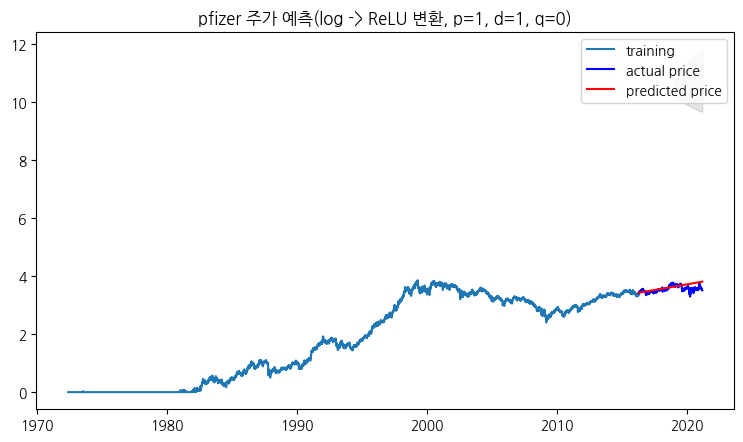

In [150]:
# Forecast : 결과가 fc에 담깁니다. 
pfizer_fc, pfizer_se, pfizer_conf = pfizer_fitted_m.forecast(len(pfizer_test_data), alpha=0.05)  # 95% conf

# Make as pandas series
pfizer_fc_series = pd.Series(pfizer_fc, index=pfizer_test_data.index)   # 예측결과
pfizer_lower_series = pd.Series(pfizer_conf[:, 0], index=pfizer_test_data.index)  # 예측결과의 하한 바운드
pfizer_upper_series = pd.Series(pfizer_conf[:, 1], index=pfizer_test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(pfizer_train_data, label='training')
plt.plot(pfizer_test_data, c='b', label='actual price')
plt.plot(pfizer_fc_series, c='r',label='predicted price')
plt.title('pfizer 주가 예측(log -> ReLU 변환, p=1, d=1, q=0)')
plt.savefig('pfizer, log->ReLU, (p,d,q)=(1,1,0).png')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

**최종 예측 모델 정확도 측정(MAPE)**  
- MAPE: 10.42%

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

pfizer_mse = mean_squared_error(np.exp(pfizer_test_data), np.exp(pfizer_fc))
print('MSE: ', pfizer_mse)

pfizer_mae = mean_absolute_error(np.exp(pfizer_test_data), np.exp(pfizer_fc))
print('MAE: ', pfizer_mae)

pfizer_rmse = math.sqrt(mean_squared_error(np.exp(pfizer_test_data), np.exp(pfizer_fc)))
print('RMSE: ', pfizer_rmse)

pfizer_mape = np.mean(np.abs(np.exp(pfizer_fc) - np.exp(pfizer_test_data))/np.abs(np.exp(pfizer_test_data)))
print('MAPE: {:.2f}%'.format(pfizer_mape*100))

MSE:  22.547452702183577
MAE:  3.6041378097376877
RMSE:  4.748415809739452
MAPE: 10.42%


### 데이터와 파라미터 변경 후 예측

**변경1: 로그 데이터 사용, (p,d,q) = (1,1,0)**
- MAPE: 11.23%

/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

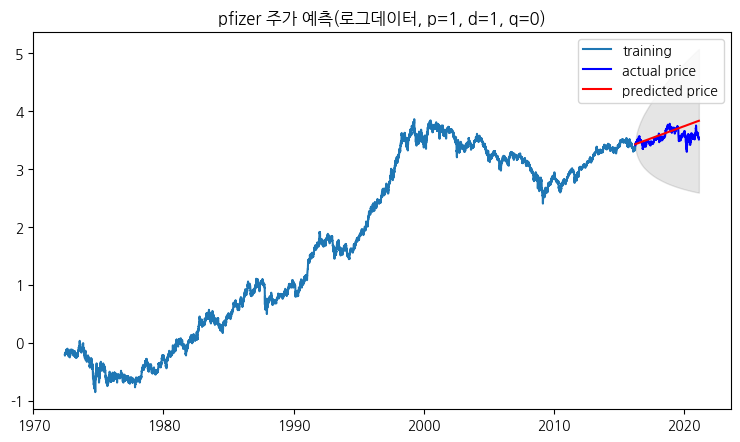

In [97]:
# 변경1: 로그 데이터 사용, (p,d,q) = (1,1,0)
pfizer_train_data, pfizer_test_data = pfizer_log[:int(len(pfizer_log)*0.9)], pfizer_log[int(len(pfizer_log)*0.9):]

# Build and Train  Model
pfizer_model = ARIMA(pfizer_train_data, order=(1, 1, 0)) # p, d, q  
pfizer_fitted_m = pfizer_model.fit(disp=-1)

# Forecast : 결과가 fc에 담깁니다. 
pfizer_fc, pfizer_se, pfizer_conf = pfizer_fitted_m.forecast(len(pfizer_test_data), alpha=0.05)  # 95% conf

# Make as pandas series
pfizer_fc_series = pd.Series(pfizer_fc, index=pfizer_test_data.index)   # 예측결과
pfizer_lower_series = pd.Series(pfizer_conf[:, 0], index=pfizer_test_data.index)  # 예측결과의 하한 바운드
pfizer_upper_series = pd.Series(pfizer_conf[:, 1], index=pfizer_test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(pfizer_train_data, label='training')
plt.plot(pfizer_test_data, c='b', label='actual price')
plt.plot(pfizer_fc_series, c='r',label='predicted price')
plt.title('pfizer 주가 예측(로그데이터, p=1, d=1, q=0)')
plt.savefig('pfizer, 로그데이터, (p,d,q)=(1,1,0).png')
plt.fill_between(pfizer_lower_series.index, pfizer_lower_series, pfizer_upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [98]:
# 변경 1의 MAPE

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

pfizer_mse = mean_squared_error(np.exp(pfizer_test_data), np.exp(pfizer_fc))
print('MSE: ', pfizer_mse)

pfizer_mae = mean_absolute_error(np.exp(pfizer_test_data), np.exp(pfizer_fc))
print('MAE: ', pfizer_mae)

pfizer_rmse = math.sqrt(mean_squared_error(np.exp(pfizer_test_data), np.exp(pfizer_fc)))
print('RMSE: ', pfizer_rmse)

pfizer_mape = np.mean(np.abs(np.exp(pfizer_fc) - np.exp(pfizer_test_data))/np.abs(np.exp(pfizer_test_data)))
print('MAPE: {:.2f}%'.format(pfizer_mape*100))

MSE:  26.732410061123968
MAE:  3.8739387588247687
RMSE:  5.170339453181383
MAPE: 11.23%


**변경2: Scale 적용(\*0.5), (p,d,q) = (1,1,0)**  
- MAPE: 5.02%

/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

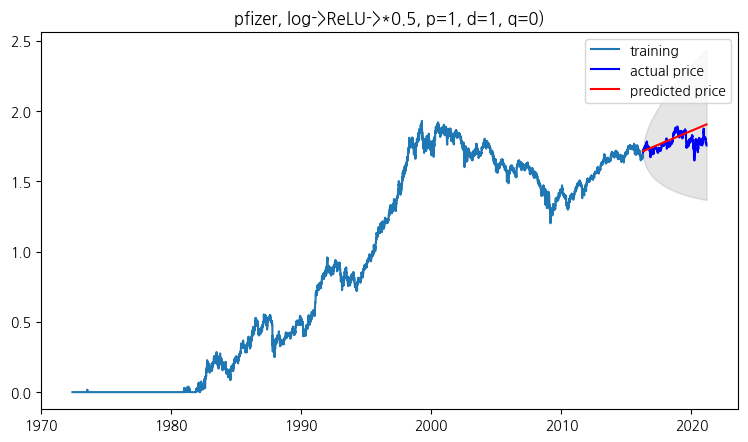

In [95]:
# 변경2: scale 적용, (p,d,q) = (1,1,0)
pfizer_scale = pfizer_final * 0.5
pfizer_train_data, pfizer_test_data = pfizer_scale[:int(len(pfizer_scale)*0.9)], pfizer_scale[int(len(pfizer_scale)*0.9):]

# Build and Train  Model
pfizer_model = ARIMA(pfizer_train_data, order=(1, 1, 0)) # p, d, q  
pfizer_fitted_m = pfizer_model.fit(disp=-1)

# Forecast : 결과가 fc에 담깁니다. 
pfizer_fc, pfizer_se, pfizer_conf = pfizer_fitted_m.forecast(len(pfizer_test_data), alpha=0.05)  # 95% conf

# Make as pandas series
pfizer_fc_series = pd.Series(pfizer_fc, index=pfizer_test_data.index)   # 예측결과
pfizer_lower_series = pd.Series(pfizer_conf[:, 0], index=pfizer_test_data.index)  # 예측결과의 하한 바운드
pfizer_upper_series = pd.Series(pfizer_conf[:, 1], index=pfizer_test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(pfizer_train_data, label='training')
plt.plot(pfizer_test_data, c='b', label='actual price')
plt.plot(pfizer_fc_series, c='r',label='predicted price')
plt.title('pfizer, log->ReLU->*0.5, p=1, d=1, q=0)')
plt.savefig('pfizer, log->ReLU->*0.5, (p,d,q)=(1,1,0).png')
plt.fill_between(pfizer_lower_series.index, pfizer_lower_series, pfizer_upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [96]:
# 변경 2의 MAPE

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

pfizer_mse = mean_squared_error(np.exp(pfizer_test_data), np.exp(pfizer_fc))
print('MSE: ', pfizer_mse)

pfizer_mae = mean_absolute_error(np.exp(pfizer_test_data), np.exp(pfizer_fc))
print('MAE: ', pfizer_mae)

pfizer_rmse = math.sqrt(mean_squared_error(np.exp(pfizer_test_data), np.exp(pfizer_fc)))
print('RMSE: ', pfizer_rmse)

pfizer_mape = np.mean(np.abs(np.exp(pfizer_fc) - np.exp(pfizer_test_data))/np.abs(np.exp(pfizer_test_data)))
print('MAPE: {:.2f}%'.format(pfizer_mape*100))

MSE:  0.14890222508345657
MAE:  0.2949811211559885
RMSE:  0.38587851078215873
MAPE: 5.02%


***

# 8. 다른 주식 종목 예측해 보기 (2) - NVIDIA
![엔비디아 로고](pics/엔비디아.png)

### 데이터 불러오기

In [69]:
# Time Series 생성
dataset_filepath = os.getenv('HOME') + '/1.AIFFEL_Study/Exploration/E13_Stock_Prediction/data/NVDA.csv'
df = pd.read_csv(dataset_filepath, index_col = 'Date', parse_dates=True)
nvda = df['Close']

nvda.head()

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
Name: Close, dtype: float64

### 결측치 처리

In [70]:
# 결측치 처리 --> 결측치 없음

nvda=nvda.interpolate(method='time')
nvda[nvda.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

### 데이터 변환
- 로그 변환 사용

In [71]:
# 로그 변환
nvda_log = np.log(nvda)

# 시그모이드
nvda_sigmoid = sigmoid(nvda)

# ReLU 변환
nvda_relu = relu(nvda)

# 최종 변환
nvda_final = relu(nvda_log)

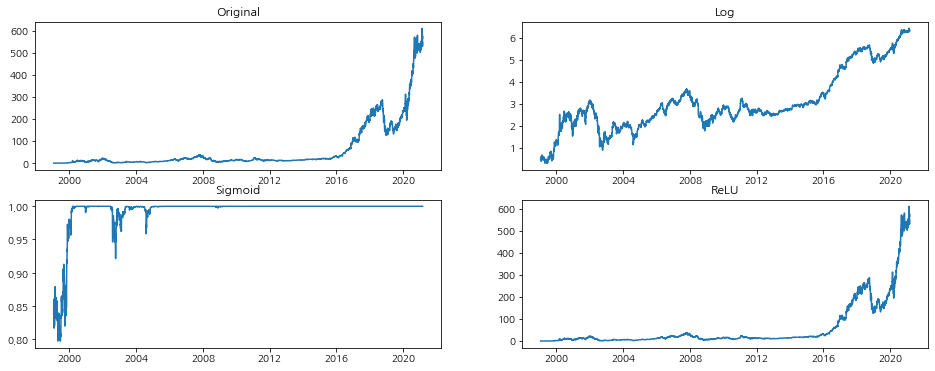

In [72]:
# 원본 데이터와 로그 변환 후 분포 확인

from matplotlib.pylab import rcParams
%matplotlib inline

plt.rcParams["figure.figsize"] = (16,6)

ax = plt.subplot(2,2,1)
plt.plot(nvda)
ax.set_title('Original')

ax = plt.subplot(2,2,2)
plt.plot(nvda_log)
ax.set_title('Log')

ax = plt.subplot(2,2,3)
plt.plot(nvda_sigmoid)
ax.set_title('Sigmoid')

ax = plt.subplot(2,2,4)
plt.plot(nvda_relu)
ax.set_title('ReLU')

plt.show()

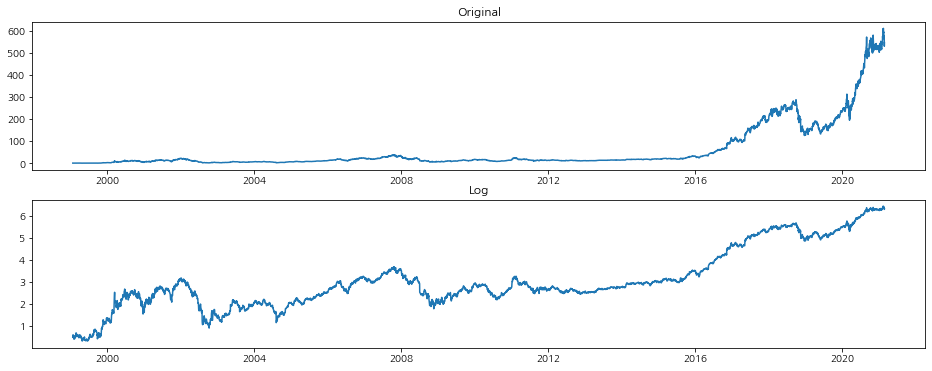

In [73]:
# 원본 데이터와 로그 변환 후 분포 확인

from matplotlib.pylab import rcParams
%matplotlib inline


plt.rcParams["figure.figsize"] = (16,6)

ax = plt.subplot(2,1,1)
plt.plot(nvda)
ax.set_title('Original')

ax = plt.subplot(2,1,2)
plt.plot(nvda_log)
ax.set_title('Log')

plt.show()

### 정성적 그래프 분석, 정량적 Augmented Dicky-Fuller Test, 시계열 분해

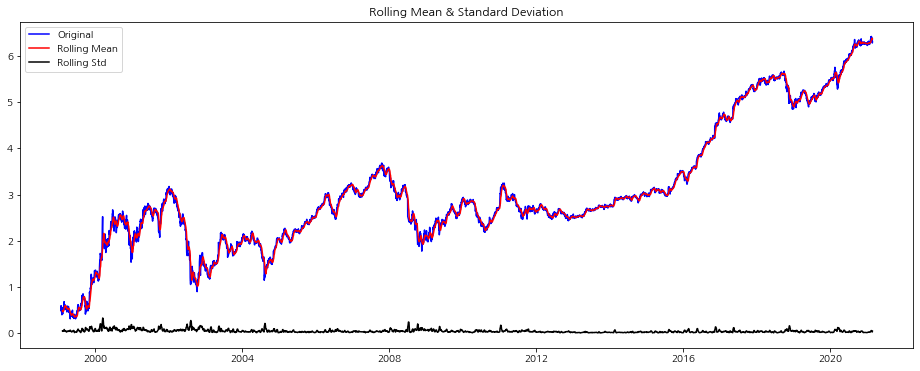

Results of Dickey-Fuller Test:
Test Statistic                   -0.514462
p-value                           0.889163
#Lags Used                       24.000000
Number of Observations Used    5536.000000
Critical Value (1%)              -3.431532
Critical Value (5%)              -2.862062
Critical Value (10%)             -2.567048
dtype: float64


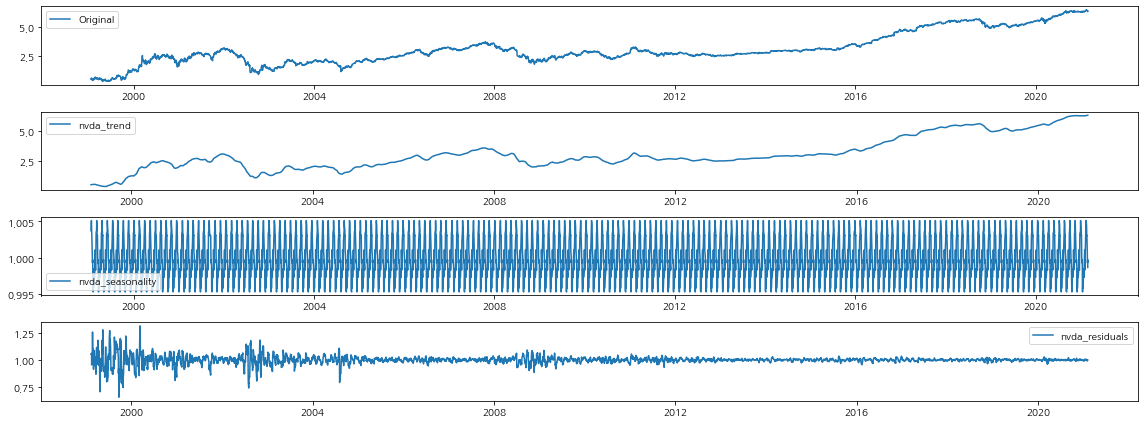

In [74]:
# 정성적 그래프 분석
plot_rolling_statistics(nvda_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(nvda_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose # 시계열 안에 존재하는 nvda_trend, nvda_seasonality를 직접 분리# 정성적 그래프 분석
decomposition = seasonal_decompose(nvda_log, model='multiplicative', period = 30) 

nvda_trend = decomposition.trend
nvda_seasonal = decomposition.seasonal
nvda_residual = decomposition.resid

plt.subplot(411)
plt.plot(nvda_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(nvda_trend, label='nvda_trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(nvda_seasonal,label='nvda_seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(nvda_residual, label='nvda_residuals')
plt.legend(loc='best')
plt.tight_layout()

### Residual에 대해 안정성 여부 확인

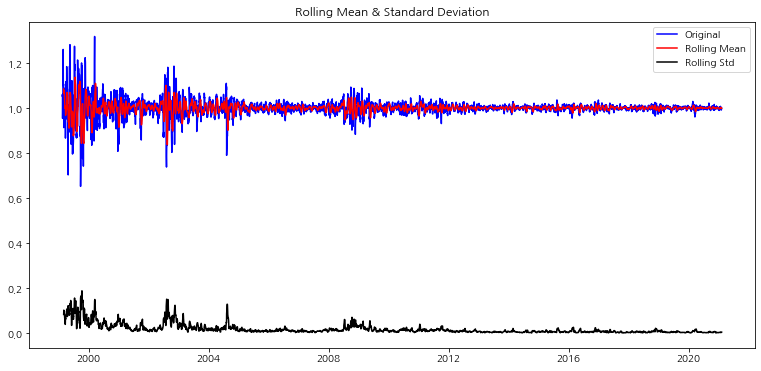

Results of Dickey-Fuller Test:
Test Statistic                -1.818161e+01
p-value                        2.432175e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.497000e+03
Critical Value (1%)           -3.431540e+00
Critical Value (5%)           -2.862066e+00
Critical Value (10%)          -2.567050e+00
dtype: float64


In [75]:
# Residual에 대해 안정성 여부 확인
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(nvda_residual)

nvda_residual.dropna(inplace=True)
augmented_dickey_fuller_test(nvda_residual) # 2.432175e-30

### 학습, 테스트 데이터셋 분리

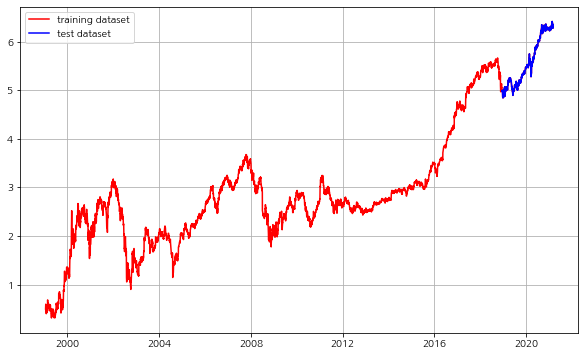

In [76]:
# 학습, 테스트 데이터셋 분리
n_train_data, n_test_data = nvda_log[:int(len(nvda_log)*0.9)], nvda_log[int(len(nvda_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(nvda_log, c='r', label='training dataset')
plt.plot(n_test_data, c='b', label='test dataset')
plt.legend()

### 적정 ARIMA 모수 찾기

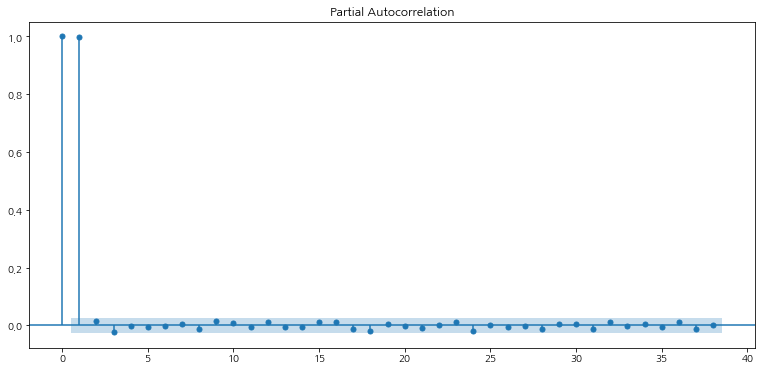

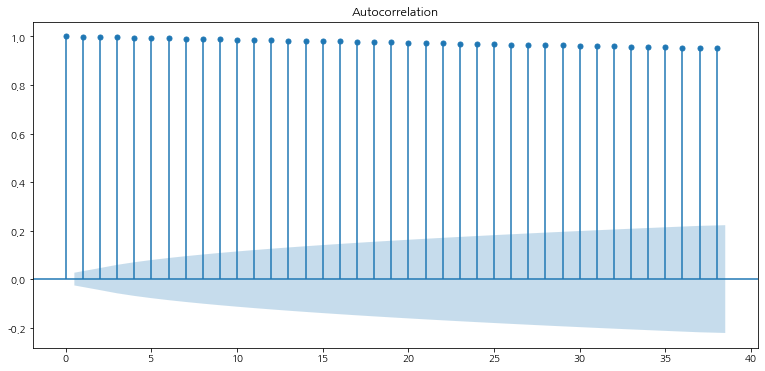

In [77]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(nvda_log)  # PACF : Partial Autocorrelation 그래프 그리기, AR 모델의 시차 p 결정
plot_acf(nvda_log)   # ACF : Autocorrelation 그래프 그리기, MA 모델의 시차 q 결정
plt.show()

### 차분 안정성 확인 -> d구하기

Results of Dickey-Fuller Test:
Test Statistic                -1.451722e+01
p-value                        5.599395e-27
#Lags Used                     2.300000e+01
Number of Observations Used    5.536000e+03
Critical Value (1%)           -3.431532e+00
Critical Value (5%)           -2.862062e+00
Critical Value (10%)          -2.567048e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -21.245375
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5525.000000
Critical Value (1%)              -3.431534
Critical Value (5%)              -2.862063
Critical Value (10%)             -2.567049
dtype: float64


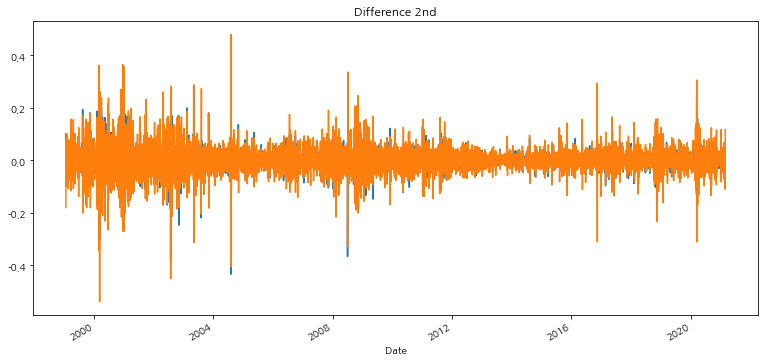

In [78]:
# 1차 차분 구하기
diff_1 = nvda_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

### ARIMA 모델 빌드와 훈련

In [79]:
from statsmodels.tsa.arima_model import ARIMA

# Build and Train  Model
nvda_model = ARIMA(n_train_data, order=(1, 1, 0)) # p, d, q  
nvda_fitted_m = nvda_model.fit(disp=-1)  
print(nvda_fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5003
Model:                 ARIMA(1, 1, 0)   Log Likelihood                9127.110
Method:                       css-mle   S.D. of innovations              0.039
Date:                Mon, 01 Mar 2021   AIC                         -18248.221
Time:                        00:09:41   BIC                         -18228.668
Sample:                             1   HQIC                        -18241.368
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.001      1.615      0.106      -0.000       0.002
ar.L1.D.Close     0.0156      0.014      1.104      0.270      -0.012       0.043
                                    Root

/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

### 모델 테스트 및 플로팅

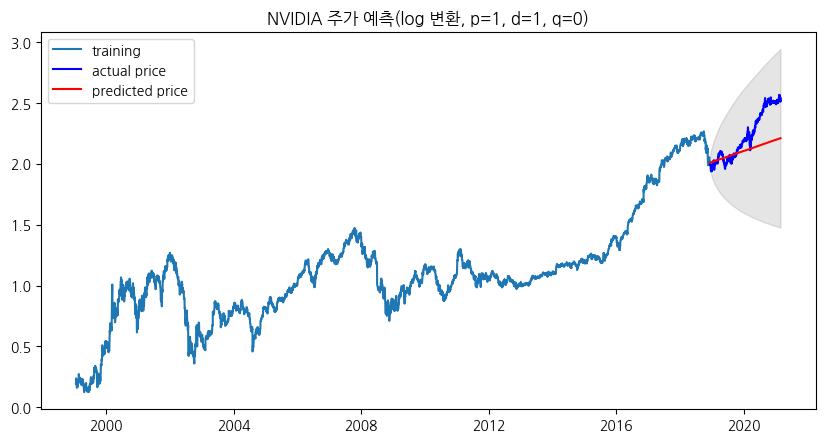

In [83]:
# Forecast : 결과가 fc에 담깁니다. 
nvda_fc, nvda_se, nvda_conf = nvda_fitted_m.forecast(len(n_test_data), alpha=0.05)  # 95% conf

# Make as pandas series
nvda_fc_series = pd.Series(nvda_fc, index=n_test_data.index)   # 예측결과
nvda_lower_series = pd.Series(nvda_conf[:, 0], index=n_test_data.index)  # 예측결과의 하한 바운드
nvda_upper_series = pd.Series(nvda_conf[:, 1], index=n_test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(n_train_data, label='training')
plt.plot(n_test_data, c='b', label='actual price')
plt.plot(nvda_fc_series, c='r',label='predicted price')
plt.title('NVIDIA 주가 예측(log 변환, p=1, d=1, q=0)')
plt.savefig('NVIDIA, log, (p,d,q)=(1,1,0).png')
plt.fill_between(nvda_lower_series.index, nvda_lower_series, nvda_upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

### 최종 예측 모델 정확도 측정(MAPE)

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

nvda_mse = mean_squared_error(np.exp(n_test_data), np.exp(nvda_fc))
print('MSE: ', nvda_mse)

nvda_mae = mean_absolute_error(np.exp(n_test_data), np.exp(nvda_fc))
print('MAE: ', nvda_mae)

nvda_rmse = math.sqrt(mean_squared_error(np.exp(n_test_data), np.exp(nvda_fc)))
print('RMSE: ', nvda_rmse)

nvda_mape = np.mean(np.abs(np.exp(nvda_fc) - np.exp(n_test_data))/np.abs(np.exp(n_test_data)))
print('MAPE: {:.2f}%'.format(nvda_mape*100))

MSE:  25806.730738840608
MAE:  108.79478779280542
RMSE:  160.6447345506245
MAPE: 26.30%


**nvidia 변경1: scale 적용(\*0.4), (p,d,q) = (1,1,0)**
- MAPE: 12.34%

/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

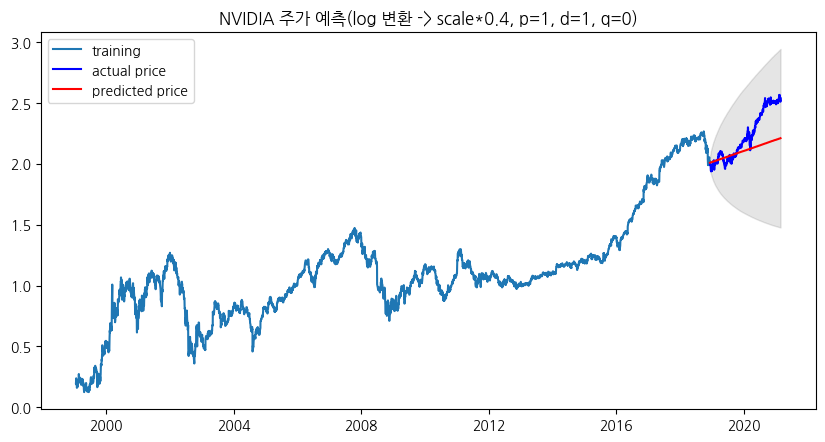

MSE:  3.641466221070275
MAE:  1.3668325904568357
RMSE:  1.9082626184753173
MAPE: 12.34%


In [84]:
# nvidia 변경1
nvda_scale = nvda_log * 0.4
n_train_data, n_test_data = nvda_scale[:int(len(nvda_scale)*0.9)], nvda_scale[int(len(nvda_scale)*0.9):]

nvda_model = ARIMA(n_train_data, order=(1, 1, 0)) # p, d, q  
nvda_fitted_m = nvda_model.fit(disp=-1)  

# Forecast : 결과가 fc에 담깁니다. 
nvda_fc, nvda_se, nvda_conf = nvda_fitted_m.forecast(len(n_test_data), alpha=0.05)  # 95% conf

# Make as pandas series
nvda_fc_series = pd.Series(nvda_fc, index=n_test_data.index)   # 예측결과
nvda_lower_series = pd.Series(nvda_conf[:, 0], index=n_test_data.index)  # 예측결과의 하한 바운드
nvda_upper_series = pd.Series(nvda_conf[:, 1], index=n_test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(n_train_data, label='training')
plt.plot(n_test_data, c='b', label='actual price')
plt.plot(nvda_fc_series, c='r',label='predicted price')
plt.title('NVIDIA 주가 예측(log 변환 -> scale*0.4, p=1, d=1, q=0)')
plt.savefig('NVIDIA, log -> *0.4, (p,d,q)=(1,1,0).png')
plt.fill_between(nvda_lower_series.index, nvda_lower_series, nvda_upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

# MAPE 구하기
nvda_mse = mean_squared_error(np.exp(n_test_data), np.exp(nvda_fc))
print('MSE: ', nvda_mse)

nvda_mae = mean_absolute_error(np.exp(n_test_data), np.exp(nvda_fc))
print('MAE: ', nvda_mae)

nvda_rmse = math.sqrt(mean_squared_error(np.exp(n_test_data), np.exp(nvda_fc)))
print('RMSE: ', nvda_rmse)

nvda_mape = np.mean(np.abs(np.exp(nvda_fc) - np.exp(n_test_data))/np.abs(np.exp(n_test_data)))
print('MAPE: {:.2f}%'.format(nvda_mape*100))

**nvidia 변경2: log 2회 변환, (p,d,q) = (1,1,0)**
- MAPE: 3.12%

/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj40/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

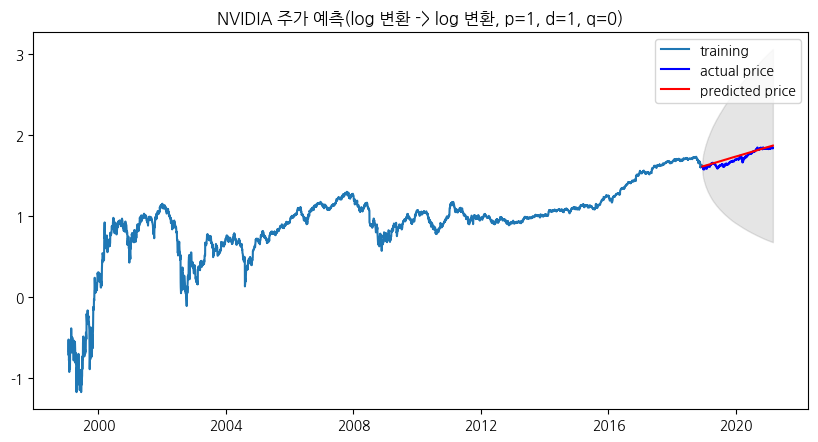

MSE:  0.04150741652723288
MAE:  0.16812824538191828
RMSE:  0.20373369021159185
MAPE: 3.12%


In [85]:
# nvidia 변경1
nvda_log_log = np.log(nvda_log)
n_train_data, n_test_data = nvda_log_log[:int(len(nvda_log_log)*0.9)], nvda_log_log[int(len(nvda_log_log)*0.9):]

nvda_model = ARIMA(n_train_data, order=(1, 1, 0)) # p, d, q  
nvda_fitted_m = nvda_model.fit(disp=-1)  

# Forecast : 결과가 fc에 담깁니다. 
nvda_fc, nvda_se, nvda_conf = nvda_fitted_m.forecast(len(n_test_data), alpha=0.05)  # 95% conf

# Make as pandas series
nvda_fc_series = pd.Series(nvda_fc, index=n_test_data.index)   # 예측결과
nvda_lower_series = pd.Series(nvda_conf[:, 0], index=n_test_data.index)  # 예측결과의 하한 바운드
nvda_upper_series = pd.Series(nvda_conf[:, 1], index=n_test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(n_train_data, label='training')
plt.plot(n_test_data, c='b', label='actual price')
plt.plot(nvda_fc_series, c='r',label='predicted price')
plt.title('NVIDIA 주가 예측(log 변환 -> log 변환, p=1, d=1, q=0)')
plt.savefig('NVIDIA, log ->log 변환, (p,d,q)=(1,1,0).png')
plt.fill_between(nvda_lower_series.index, nvda_lower_series, nvda_upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

# MAPE 구하기
nvda_mse = mean_squared_error(np.exp(n_test_data), np.exp(nvda_fc))
print('MSE: ', nvda_mse)

nvda_mae = mean_absolute_error(np.exp(n_test_data), np.exp(nvda_fc))
print('MAE: ', nvda_mae)

nvda_rmse = math.sqrt(mean_squared_error(np.exp(n_test_data), np.exp(nvda_fc)))
print('RMSE: ', nvda_rmse)

nvda_mape = np.mean(np.abs(np.exp(nvda_fc) - np.exp(n_test_data))/np.abs(np.exp(n_test_data)))
print('MAPE: {:.2f}%'.format(nvda_mape*100))

***

# 9. 결과
## 9-1. 삼성

**잔차 안정성**
![삼성_잔차](pics/삼성_잔차.png)

**변경에 대한 결과 데이터 프레임**  
- p,d,q의 변경으로 유의미한 결과를 얻지 못했다.  
- 데이터 변환으로 log변환을 2회 한 결과 예측 결과는 실제와 달라졌지만 <span style="color:red">**MAPE값이 감소했다.**</span>  
- **최종 개선 MAPE: 8.56%**  

**하지만 이 결과는 MAPE를 구하는 식 중 `np.abs(np.exp(test_data))`의 값이 작아져서 그렇게 나온 것으로 생각한다.**

In [88]:
samsung_df = pd.DataFrame([
                            ['log변환',1,1,0,'19.59%'],
                            ['log변환',0,1,5,'19.31%'],
                            ['log변환',0,1,10,'19.22%'],
                            ['log변환',0,1,12,'19.28%'],
                            ['log변환',0,1,20,'19,92%'],
                            ['log변환',0,1,30,'21.19%'],
                            ['log변환',1,1,0,'19,59%'],
                            ['log변환',2,1,0,'19,48%'],
                            ['log변환 2회', 1,1,0,'1.97%'],
                            ['log변환*0.8', 1,1,0,'16.13%'],
                            ['log변환*0.6', 1,1,0,'12.46%'],
                            ['log변환*0.4', 1,1,0,'8.56%'],
                            ['log변환*0.4', 0,1,10,'8.39%']], 
                            columns = ['data변환', 'p', 'd', 'q', 'MAPE'])
samsung_df    

,data변환,p,d,q,MAPE
0,log변환,1,1,0,19.59%
1,log변환,0,1,5,19.31%
2,log변환,0,1,10,19.22%
3,log변환,0,1,12,19.28%
4,log변환,0,1,20,"19,92%"
5,log변환,0,1,30,21.19%
6,log변환,1,1,0,"19,59%"
7,log변환,2,1,0,"19,48%"
8,log변환 2회,1,1,0,1.97%
9,log변환*0.8,1,1,0,16.13%


**주요 그래프**  
- 그래프에서는 유미의한 변화는 없으나, MAPE 값이 감소(로그변환 -> \*0.4 적용한 데이터 사용)

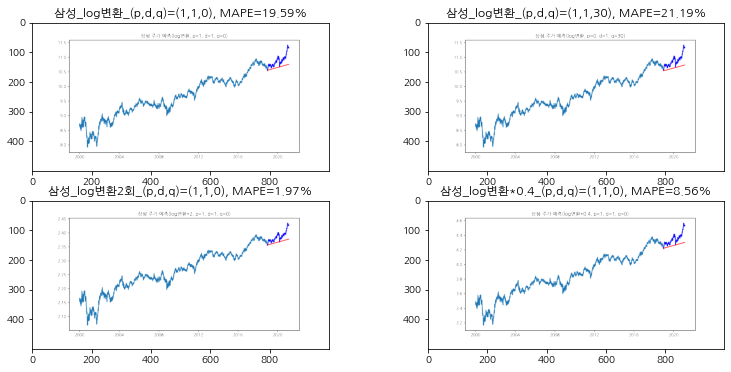

In [93]:
from PIL import Image
s_1 = Image.open('pics/삼성, log변환, (p,d,q)=(1,1,0).png')
s_2 = Image.open('pics/삼성, log변환, (p,d,q)=(0,1,30).png')
s_3 = Image.open('pics/삼성, log변환*2, (p,d,q)=(1,1,0).png')
s_4 = Image.open('pics/삼성, log변환*0.4, (p,d,q)=(1,1,0).png')

ax = plt.subplot(2,2,1)
plt.imshow(s_1)
ax.set_title('삼성_log변환_(p,d,q)=(1,1,0), MAPE=19.59%')

ax = plt.subplot(2,2,2)
plt.imshow(s_2)
ax.set_title('삼성_log변환_(p,d,q)=(1,1,30), MAPE=21.19%')

ax = plt.subplot(2,2,3)
plt.imshow(s_3)
ax.set_title('삼성_log변환2회_(p,d,q)=(1,1,0), MAPE=1.97%')

ax = plt.subplot(2,2,4)
plt.imshow(s_4)
ax.set_title('삼성_log변환*0.4_(p,d,q)=(1,1,0), MAPE=8.56%')

plt.show()

## 9-2. pfizer

**잔차 안정성**
![화이자_잔차](pics/pfizer_잔차.png)

**변경에 대한 결과 데이터 프레임**  
- 단순 로그 변환보다 ReLU와 Scale변화를 통해 **예측 성능 및 MAPE 개선!**  
화이자 주식 데이터의 경우 **너무 낮은 값을 0과 가깝게 전처리**하고 난 후(ReLU) 성능이 올라간 것을 확인했다.  
- **최종 개선 MAPE: 5.02%**

In [94]:
pfizer_df = pd.DataFrame([
                            ['log->ReLU',1,1,0,'10.42%'],
                            ['log',1,1,0,'11.23%'],
                            ['log->ReLU->*0.5',1,1,0,'5.02%']], 
                            columns = ['data변환', 'p', 'd', 'q', 'MAPE']) 
pfizer_df

,data변환,p,d,q,MAPE
0,log->ReLU,1,1,0,10.42%
1,log,1,1,0,11.23%
2,log->ReLU->*0.5,1,1,0,5.02%


**주요 그래프**

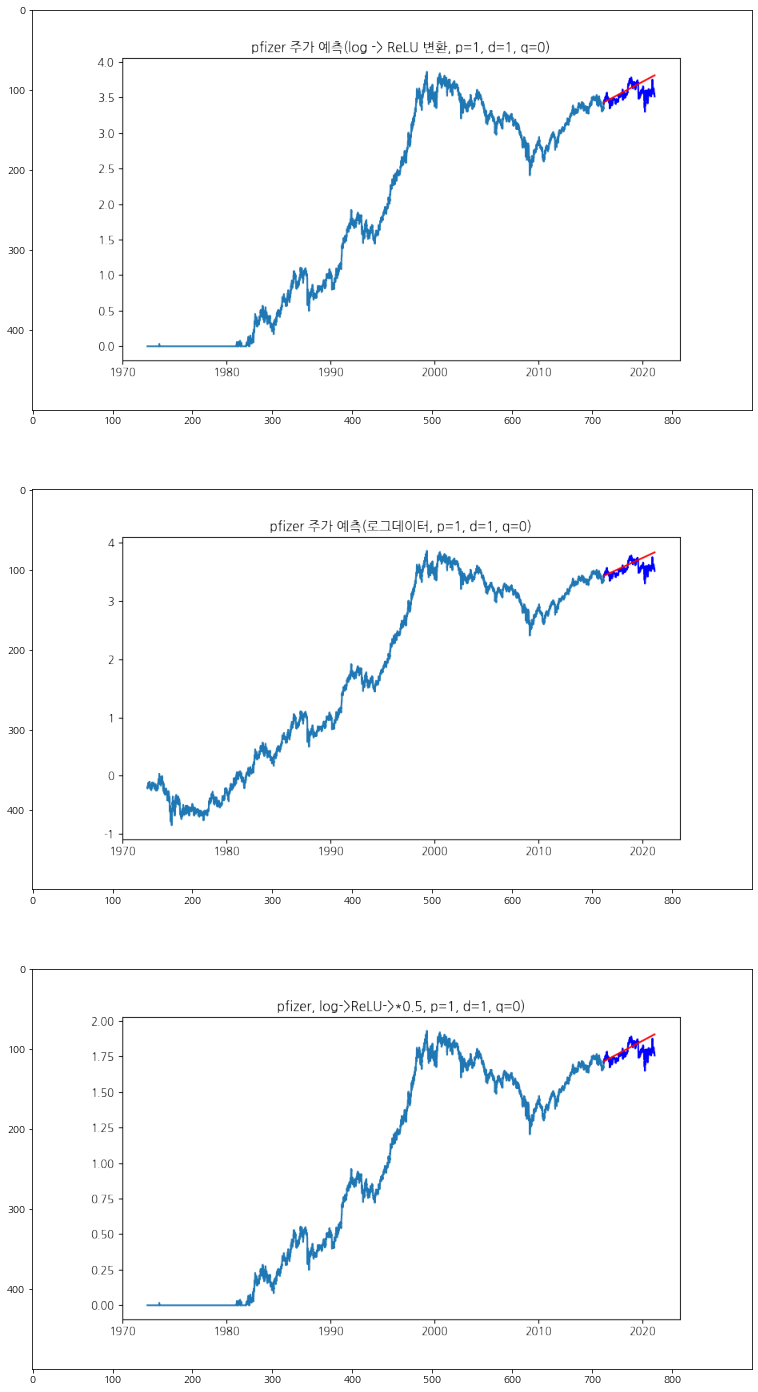

In [151]:
p_1 = Image.open('pics/pfizer, log->ReLU, (p,d,q)=(1,1,0).png')
p_2 = Image.open('pics/pfizer, 로그데이터, (p,d,q)=(1,1,0).png')
p_3 = Image.open('pics/pfizer, log->ReLU->*0.5, (p,d,q)=(1,1,0).png')

plt.figure(figsize=(20,25))
plt.subplot(3,1,1)
plt.imshow(p_1)
plt.subplot(3,1,2)
plt.imshow(p_2)
plt.subplot(3,1,3)
plt.imshow(p_3)

fig.tight_layout()
plt.show()

## 9-3. NVIDIA

**잔차 안정성**

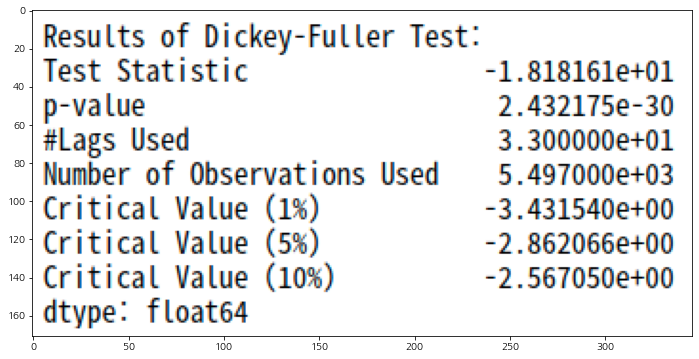

In [130]:
n_residual = Image.open('pics/nvidia_ 잔차.png')
plt.imshow(n_residual)
plt.show()

**변경에 대한 결과 데이터 프레임**  
- 단순 로그 변환으로는 예측 성능과 MAPE 모두 좋지 않았다.  
- Scale와 로그 변환을 한 번 더 시도한 결과 성능이 개선된 것을 보았다.  
- 특히 **로그 변환 2회 후에는 예측 그래프가 실제와 거의 비슷하게 예측**되었다!

In [131]:
nvidia_df = pd.DataFrame([
                            ['log변환',1,1,0,'26.30%'],
                            ['log->*0.4',1,1,0,'12.34%'],
                            ['log->log',1,1,0,'3.12%'],], 
                            columns = ['data변환', 'p', 'd', 'q', 'MAPE']) 

nvidia_df

,data변환,p,d,q,MAPE
0,log변환,1,1,0,26.30%
1,log->*0.4,1,1,0,12.34%
2,log->log,1,1,0,3.12%


**주요 그래프**

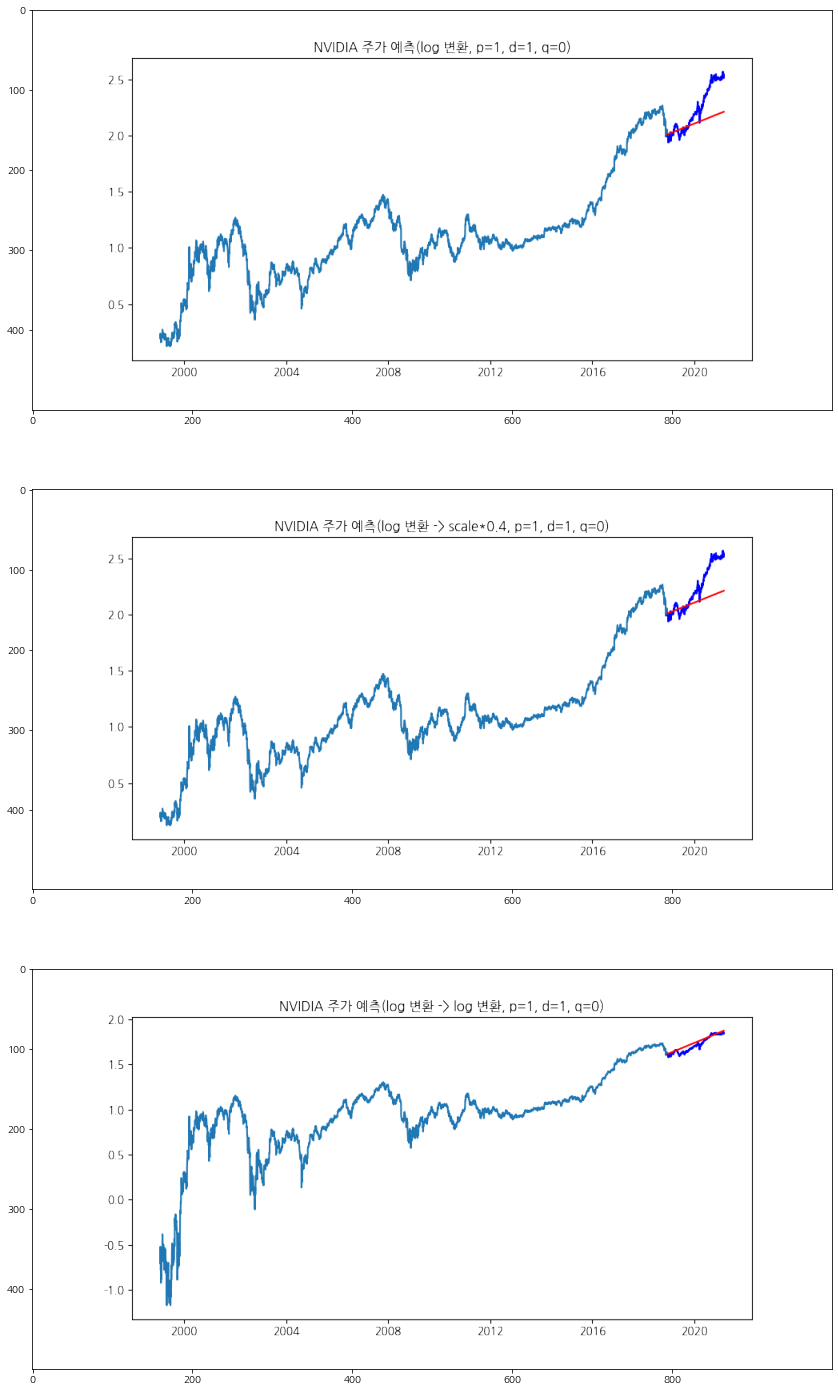

In [134]:
n_1 = Image.open('pics/NVIDIA, log, (p,d,q)=(1,1,0).png')
n_2 = Image.open('pics/NVIDIA, log -> *0.4, (p,d,q)=(1,1,0).png')
n_3 = Image.open('pics/NVIDIA, log ->log 변환, (p,d,q)=(1,1,0).png')

plt.figure(figsize=(20,25))
plt.subplot(3,1,1)
plt.imshow(n_1)
plt.subplot(3,1,2)
plt.imshow(n_2)
plt.subplot(3,1,3)
plt.imshow(n_3)

fig.tight_layout()
plt.show()

***

# 10. 회고

## 10-1. 루브릭

#### 1. 시계열의 안정성이 충분히 확인되었는가? (플로팅과 adfuller 메소드가 모두 적절히 사용되었음)
- 잔차를 추출해 확인함 

#### 2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가? (p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨)
- ACF, PACF를 이용해 p,d,q를 선택했고, 계산 결과를 통해 정해진 수준에서 변경을 통해 성능 변화를 측정했다.  

#### 3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가? (3개 이상 종목이 MAPE 10% 미만의 정확도로 예측됨)
- 삼성, 화이자, 엔비디아 모두 MAPE 10% 미만을 달성

## 10-2. 회고
1) 시계열, 시계열 많이 들었던 개념인데 이번에 좀 진득하게 붙잡아보고 진행한 느낌이다.  
2) 특히 주식이라는 작년부터 많은 사람들의 관심이 큰 분야의 예측이라 실제로 투자하는 느낌이라 재밌었다. (물론 투자는 신중히)  
3) 시계열 데이터의 추세, 계절성, 잔차 그리고 ARIMA 모델에 대한 이해를 할 수 있었다.  
4) 귀무가설, 대립가설의 개념과 실례를 통해 배울 수 있었고, p-value에 대한 이해를 할 수 있었다.  
5) 세 가지 종목 중 삼성의 데이터는 다양한 변화를 통해 어떤 양상을 보이는 지 확인하려고 했는데, (p,d,q)의 변화에 따라서 크게 바뀌지 않았다. q를 30까지 변경했는데 더 크게 변경해야 하나? 생각이 들었다.  
6) 그래서 데이터 자체의 변화가 필요하다고 느꼈고, 예측 그래프는 크게 변화가 없었지만 MAPE값이 감소하는 것을 확인했다.  
7) 아마 이것은 감소한 값만큼 그만큼 감소한다고 생각했다.
8) 하지만 화이자 주식 데이터에서 데이터 변화에 따라 예측 그래프가 실제와 비슷하게 변화하는 것을 확인했다.  
9) 아직 시계열 데이터에 대한 이해가 완벽하지 않아 이러한 차이가 왜 생기는 지 궁금하다. 이 부분은 '질문'을 통해 사람들과 공유하면 의미있을 것이다.  
10) 그리고 의도치않게 시각화에 대한 문법들을 다시 써보며 내것으로 만드는 시간이었다.